# Time series

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np

In [6]:
# This fixes problem with SSL: CERTIFICATE_VERIFY_FAILED in read_csv
# https://stackoverflow.com/questions/50236117/scraping-ssl-certificate-verify-failed-error-for-http-en-wikipedia-org

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

### Import csv data from internet

In [9]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/dly4935.csv", skiprows=23, nrows=1000)

In [10]:
df.shape

(1000, 25)

In [11]:
df.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,ind.5,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd
0,01-aug-1996,4,,4,,,,8,,,...,1,,1.1,0,,,,,,
1,02-aug-1996,0,15.1,0,9.2,,,0,0.3,999.2,...,0,18,,0,,,,,,
2,03-aug-1996,0,18.0,0,11.6,0,11.4,0,0.0,1002.1,...,0,18,5.7,0,15.600,2.7,3.7,2.7,2.7,2.7
3,04-aug-1996,0,20.4,0,9.6,0,8.6,0,0.1,991.7,...,0,32,6.8,0,15.975,3.7,5.0,6.2,6.2,6.3
4,05-aug-1996,0,13.7,0,8.7,0,10.9,0,13.3,983.8,...,0,24,0.0,0,14.625,1.1,1.8,0.0,-6.1,-5.9


In [12]:
df.columns

Index(['date', 'ind', 'maxtp', 'ind.1', 'mintp', 'igmin', 'gmin', 'ind.2',
       'rain', 'cbl', 'wdsp', 'ind.3', 'hm', 'ind.4', 'ddhm', 'ind.5', 'hg',
       'sun', 'dos', 'soil', 'pe', 'evap', 'smd_wd', 'smd_md', 'smd_pd'],
      dtype='object')

In [15]:
df['datetime']=pd.to_datetime(df['date'])

In [16]:
df.head()

,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,soil,pe,evap,smd_wd,smd_md,smd_pd,datetime
0,01-aug-1996,4,,4,,,,8,,,...,,1.1,0,,,,,,,1996-08-01
1,02-aug-1996,0,15.1,0,9.2,,,0,0.3,999.2,...,18,,0,,,,,,,1996-08-02
2,03-aug-1996,0,18.0,0,11.6,0,11.4,0,0.0,1002.1,...,18,5.7,0,15.600,2.7,3.7,2.7,2.7,2.7,1996-08-03
3,04-aug-1996,0,20.4,0,9.6,0,8.6,0,0.1,991.7,...,32,6.8,0,15.975,3.7,5.0,6.2,6.2,6.3,1996-08-04
4,05-aug-1996,0,13.7,0,8.7,0,10.9,0,13.3,983.8,...,24,0.0,0,14.625,1.1,1.8,0.0,-6.1,-5.9,1996-08-05


In [20]:
df = df.dropna()

### Plot time series

<AxesSubplot:xlabel='datetime', ylabel='maxtp'>

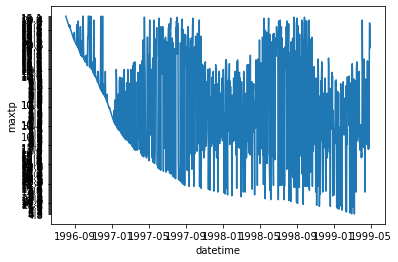

In [25]:
sns.lineplot(x="datetime", y="maxtp", data=df)

## Create time series

In [26]:
# Adapted from: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html
rng = pd.date_range(start='1/1/2018', periods=72, freq='H')

In [27]:
rng

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-01 01:00:00',
               '2018-01-01 02:00:00', '2018-01-01 03:00:00',
               '2018-01-01 04:00:00', '2018-01-01 05:00:00',
               '2018-01-01 06:00:00', '2018-01-01 07:00:00',
               '2018-01-01 08:00:00', '2018-01-01 09:00:00',
               '2018-01-01 10:00:00', '2018-01-01 11:00:00',
               '2018-01-01 12:00:00', '2018-01-01 13:00:00',
               '2018-01-01 14:00:00', '2018-01-01 15:00:00',
               '2018-01-01 16:00:00', '2018-01-01 17:00:00',
               '2018-01-01 18:00:00', '2018-01-01 19:00:00',
               '2018-01-01 20:00:00', '2018-01-01 21:00:00',
               '2018-01-01 22:00:00', '2018-01-01 23:00:00',
               '2018-01-02 00:00:00', '2018-01-02 01:00:00',
               '2018-01-02 02:00:00', '2018-01-02 03:00:00',
               '2018-01-02 04:00:00', '2018-01-02 05:00:00',
               '2018-01-02 06:00:00', '2018-01-02 07:00:00',
               '2018-01-

In [35]:
ts = pd.DataFrame(np.random.poisson(10, len(rng)), index=rng, columns=["admissions"])

In [36]:
ts

,admissions
2018-01-01 00:00:00,12
2018-01-01 01:00:00,11
2018-01-01 02:00:00,6
2018-01-01 03:00:00,8
2018-01-01 04:00:00,8
...,...
2018-01-03 19:00:00,9
2018-01-03 20:00:00,7
2018-01-03 21:00:00,8
2018-01-03 22:00:00,10


### Accessing and groupping

In [37]:
ts.mean()

admissions    9.902778
dtype: float64

In [41]:
ts.loc['2018-01-01 00:00:00':'2018-01-01 23:00:00'].mean()

admissions    10.041667
dtype: float64

In [43]:
ts.resample('D').mean()

,admissions
2018-01-01,10.041667
2018-01-02,10.458333
2018-01-03,9.208333
